In [66]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
# data2
data2 = pd.read_csv('./Terrain_Test/data/RESULT.csv')
data2

,SY_POINT_GD_GB_PRJ,X,Y,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI5,TPI11,TPI201,TPI3,TWI5
0,4958,407891.5922,3089823.370,0.000000,0.399902,95.195572,-0.399902,859.200012,7,8.0,305,808.666687,1.581960,159.083328,-7.234863,-0.008179,-34.929260,0.000794,10.361465
1,4959,408073.3197,3089689.435,0.000000,0.000000,225.000000,0.000000,860.700012,7,8.0,305,808.666687,0.405160,159.083328,-11.281555,-0.013916,-34.872925,0.003479,10.107209
2,5070,404319.5760,3089004.085,0.055485,-0.345150,254.744080,0.400635,981.900024,3,1.0,3022,812.000000,3.262861,152.666672,-2.516785,-0.235535,-7.492310,-0.019470,8.234723
3,5071,404534.1358,3088889.681,-1.912729,0.887564,224.999390,-2.800293,982.299988,3,1.0,3022,809.333313,11.393971,156.416672,16.513123,-0.686340,23.088379,-0.041321,6.055318
4,5072,407910.5926,3089414.906,-0.037713,1.162238,103.567131,-1.199951,870.500000,7,8.0,305,808.666687,4.265323,159.083328,-1.748047,-0.055908,-23.163269,-0.017090,6.684364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,2724,413501.3119,3151629.372,5.227324,-1.572480,34.695072,6.799805,1212.000000,3,6.0,7110,877.500000,15.466873,134.000000,-20.178101,-0.438843,-43.349854,-0.040527,3.749358
6804,2725,414850.2258,3151562.076,0.547053,1.346369,74.147934,-0.799316,1231.900024,3,2.0,6073,876.750000,11.887654,135.583328,20.079712,0.385254,35.971069,0.021973,4.638661
6805,2726,415155.1013,3151693.570,-1.467510,-1.068095,63.435486,-0.399414,1178.800049,3,2.0,6073,871.083313,16.208702,139.333328,6.350464,0.354492,13.728271,0.036133,5.042575
6806,6806,410856.4449,3153163.568,-1.741844,2.658546,325.855774,-4.400391,1357.199951,6,6.0,150,NaN,14.724075,NaN,-33.270508,-1.991089,-68.870117,-0.258423,3.450914


In [68]:
# 读取数据
data = pd.read_csv('./Terrain_Test/data/result2.csv')
data

,SY_POINT_GD_GB_PRJ,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI11,TPI101,TPI201,TPI5,TWI5,PH
0,4958,0.000000,0.399902,95.195572,-0.399902,859.200012,7,8.0,305,808.666687,1.581960,159.083328,-7.234863,-0.008179,-34.929260,0.000794,10.361465,6.89
1,4959,0.000000,0.000000,225.000000,0.000000,860.700012,7,8.0,305,808.666687,0.405160,159.083328,-11.281555,-0.013916,-34.872925,0.003479,10.107209,6.97
2,5070,0.055485,-0.345150,254.744080,0.400635,981.900024,3,1.0,3022,812.000000,3.262861,152.666672,-2.516785,-0.235535,-7.492310,-0.019470,8.234723,6.16
3,5071,-1.912729,0.887564,224.999390,-2.800293,982.299988,3,1.0,3022,809.333313,11.393971,156.416672,16.513123,-0.686340,23.088379,-0.041321,6.055318,5.29
4,5072,-0.037713,1.162238,103.567131,-1.199951,870.500000,7,8.0,305,808.666687,4.265323,159.083328,-1.748047,-0.055908,-23.163269,-0.017090,6.684364,6.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,2724,5.227324,-1.572480,34.695072,6.799805,1212.000000,3,6.0,7110,877.500000,15.466873,134.000000,-20.178101,-0.438843,-43.349854,-0.040527,3.749358,6.05
6804,2725,0.547053,1.346369,74.147934,-0.799316,1231.900024,3,2.0,6073,876.750000,11.887654,135.583328,20.079712,0.385254,35.971069,0.021973,4.638661,4.59
6805,2726,-1.467510,-1.068095,63.435486,-0.399414,1178.800049,3,2.0,6073,871.083313,16.208702,139.333328,6.350464,0.354492,13.728271,0.036133,5.042575,4.99
6806,6806,-1.741844,2.658546,325.855774,-4.400391,1357.199951,6,6.0,150,NaN,14.724075,NaN,-33.270508,-1.991089,-68.870117,-0.258423,3.450914,6.21


In [69]:
# 将A表和B表按照列S进行合并
data = pd.merge(data, data2[['SY_POINT_GD_GB_PRJ', 'X', 'Y']], on='SY_POINT_GD_GB_PRJ', how='left')
data

,SY_POINT_GD_GB_PRJ,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI11,TPI101,TPI201,TPI5,TWI5,PH,X,Y
0,4958,0.000000,0.399902,95.195572,-0.399902,859.200012,7,8.0,305,808.666687,1.581960,159.083328,-7.234863,-0.008179,-34.929260,0.000794,10.361465,6.89,407891.5922,3089823.370
1,4959,0.000000,0.000000,225.000000,0.000000,860.700012,7,8.0,305,808.666687,0.405160,159.083328,-11.281555,-0.013916,-34.872925,0.003479,10.107209,6.97,408073.3197,3089689.435
2,5070,0.055485,-0.345150,254.744080,0.400635,981.900024,3,1.0,3022,812.000000,3.262861,152.666672,-2.516785,-0.235535,-7.492310,-0.019470,8.234723,6.16,404319.5760,3089004.085
3,5071,-1.912729,0.887564,224.999390,-2.800293,982.299988,3,1.0,3022,809.333313,11.393971,156.416672,16.513123,-0.686340,23.088379,-0.041321,6.055318,5.29,404534.1358,3088889.681
4,5072,-0.037713,1.162238,103.567131,-1.199951,870.500000,7,8.0,305,808.666687,4.265323,159.083328,-1.748047,-0.055908,-23.163269,-0.017090,6.684364,6.02,407910.5926,3089414.906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,2724,5.227324,-1.572480,34.695072,6.799805,1212.000000,3,6.0,7110,877.500000,15.466873,134.000000,-20.178101,-0.438843,-43.349854,-0.040527,3.749358,6.05,413501.3119,3151629.372
6804,2725,0.547053,1.346369,74.147934,-0.799316,1231.900024,3,2.0,6073,876.750000,11.887654,135.583328,20.079712,0.385254,35.971069,0.021973,4.638661,4.59,414850.2258,3151562.076
6805,2726,-1.467510,-1.068095,63.435486,-0.399414,1178.800049,3,2.0,6073,871.083313,16.208702,139.333328,6.350464,0.354492,13.728271,0.036133,5.042575,4.99,415155.1013,3151693.570
6806,6806,-1.741844,2.658546,325.855774,-4.400391,1357.199951,6,6.0,150,NaN,14.724075,NaN,-33.270508,-1.991089,-68.870117,-0.258423,3.450914,6.21,410856.4449,3153163.568


In [70]:
# 删除缺失值
# 删除有缺失值的行
data.dropna(inplace=True)
missing_values = data.isnull().sum()
missing_values

SY_POINT_GD_GB_PRJ    0
PLCUR                 0
POCUR                 0
ASP                   0
CUR                   0
DEM                   0
DL                    0
DZ                    0
NDVI                  0
PRE                   0
SLOPE                 0
TMP                   0
TPI11                 0
TPI101                0
TPI201                0
TPI5                  0
TWI5                  0
PH                    0
X                     0
Y                     0
dtype: int64

In [71]:
data.drop(['SY_POINT_GD_GB_PRJ'], axis=1, inplace=True)
data.columns

Index(['PLCUR', 'POCUR', 'ASP', 'CUR', 'DEM', 'DL', 'DZ', 'NDVI', 'PRE',
       'SLOPE', 'TMP', 'TPI11', 'TPI101', 'TPI201', 'TPI5', 'TWI5', 'PH', 'X',
       'Y'],
      dtype='object')

In [ ]:
data.drop(columns=['dl'],inplace=True)

In [72]:
# 划分测试数据
train_data = data.sample(frac=0.7,random_state=0)   # 80%的数据用于训练
test_data = data.drop(train_data.index)                 # 20%的数据用于测试
train_data.sample()

,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI11,TPI101,TPI201,TPI5,TWI5,PH,X,Y
6682,3.670835,-8.32941,140.301422,12.000244,670.200012,7,1.0,6281,842.25,19.004759,165.083328,-13.490417,1.972778,-15.704834,0.15155,3.840017,7.0,422132.5674,3142135.986


In [73]:
label = 'PH'
train_data[label].describe()

count    4764.000000
mean        5.913144
std         0.935529
min         4.140000
25%         5.210000
50%         5.710000
75%         6.432500
max         8.460000
Name: PH, dtype: float64

In [76]:
predictor = TabularPredictor(label=label).fit(train_data,time_limit=600)
# predictor = TabularPredictor.load("AutogluonModels/ag-20230801_035510/")


No path specified. Models will be saved in: "AutogluonModels/ag-20230801_055712/"
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230801_055712/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Apr 2 22:23:49 UTC 2021
Disk Space Avail:   226.92 GB / 269.49 GB (84.2%)
Train Data Rows:    4764
Train Data Columns: 18
Label Column: PH
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (8.46, 4.14, 5.91314, 0.93553)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerato

In [77]:
# 读取需要测试的数据
data_test1 = pd.read_csv('./Terrain_Test/data/RESULT_TEST.csv')
data_test1

,SY_PH_PRJ,X,Y,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI101,TPI11,TPI201,TPI5,TWI5
0,1,426049.8178,3099540.645,1.400550,-1.399254,344.876587,2.799805,965.099976,7.0,6.0,192.0,826.833313,10.848595,150.166672,-10.788635,-0.050964,-14.137451,0.003113,6.225521
1,2,424922.4587,3096533.090,-2.522954,2.676753,57.264351,-5.199707,891.400024,3.0,6.0,235.0,819.833313,14.017262,156.250000,-15.232605,-0.209045,-23.497498,-0.012268,4.602912
2,3,423145.3092,3096493.346,0.000000,0.399902,180.000000,-0.399902,873.500000,7.0,8.0,112.0,819.750000,0.572799,156.833328,-4.596802,-0.081848,-17.307007,-0.002747,9.242903
3,4,423304.5794,3095087.012,0.184639,-0.215508,152.648422,0.400147,870.700012,22.0,6.0,226.0,816.833313,4.666484,157.916672,-6.337097,-0.049133,-11.128784,-0.005737,6.696948
4,5,423555.5811,3093706.700,-1.187759,2.011948,353.073212,-3.199707,917.400024,3.0,6.0,114.0,817.583313,15.081197,156.416672,3.633057,0.076660,2.630066,0.007507,6.218498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,434616.5076,3100324.330,-1.354114,2.646374,326.673462,-4.000488,773.599976,3.0,6.0,2030.0,824.583313,23.597338,159.250000,-39.609741,-0.291870,-77.841370,0.053040,4.136921
137,138,426889.0177,3098275.379,0.799805,4.000000,0.320005,-3.200195,874.799988,3.0,6.0,149.0,821.916687,24.108879,154.666672,-22.616943,1.327576,-35.558960,0.065063,3.828163
138,139,432009.5872,3100927.318,-0.254982,2.544823,82.875969,-2.799805,766.500000,7.0,2.0,323.0,825.583313,6.895482,160.583328,-23.674255,-1.779907,-34.757874,-0.122742,6.911145
139,140,432016.4527,3100923.954,-0.448806,-0.048903,31.760740,-0.399902,766.299988,7.0,2.0,323.0,825.583313,3.533275,160.583328,-24.014465,-1.837830,-34.691894,-0.141541,9.521799


In [78]:
data_test2 = pd.read_csv('./Terrain_Test/data/SY_PH_PRJ.csv')
data_test2

,SY_PH_PRJ,乡_镇_名称,村名称,农户名称,地块名称,pH1,北纬,东经,海拔,X,Y
0,1,洋川镇,团山村,山堡一组2021,变更调查1806#点,4.6,28.00786,107.24814,1117.0,426049.8178,3.099541e+06
1,2,洋川镇,兴隆村,兴隆组2021,变更调查1810#点,6.4,27.98066,107.23687,900.0,424922.4587,3.096533e+06
2,3,洋川镇,兴隆村,二组2021,变更调查1812#点,5.9,27.98020,107.21881,823.0,423145.3092,3.096493e+06
3,4,洋川镇,兴隆村,五组2021,变更调查1811#点,4.9,27.96752,107.22052,888.0,423304.5794,3.095087e+06
4,5,洋川镇,民丰村,达木四组2021,变更调查1922#点,7.2,27.95508,107.22316,913.0,423555.5811,3.093707e+06
...,...,...,...,...,...,...,...,...,...,...,...
136,137,大路槽乡,长阳村,河坎组2021,变更调查2442#点,6.4,28.01538,107.33519,762.0,434616.5076,3.100324e+06
137,138,大路槽,文星村,高峰组2021,变更调查2445#点,5.2,27.99649,107.25675,885.0,426889.0177,3.098275e+06
138,139,大路槽乡,大路槽村,詹兴荣,SYX006监测点配方区,6.1,28.02069,107.30865,709.0,432009.5872,3.100927e+06
139,140,大路槽乡,大路槽村,詹兴荣,SYX006监测点习惯区,6.4,28.02066,107.30872,709.0,432016.4527,3.100924e+06


In [79]:
# 将A表和B表按照列S进行合并
data_test = pd.merge(data_test1, data_test2[['SY_PH_PRJ','pH1']], on='SY_PH_PRJ', how='left')
data_test

,SY_PH_PRJ,X,Y,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI101,TPI11,TPI201,TPI5,TWI5,pH1
0,1,426049.8178,3099540.645,1.400550,-1.399254,344.876587,2.799805,965.099976,7.0,6.0,192.0,826.833313,10.848595,150.166672,-10.788635,-0.050964,-14.137451,0.003113,6.225521,4.6
1,2,424922.4587,3096533.090,-2.522954,2.676753,57.264351,-5.199707,891.400024,3.0,6.0,235.0,819.833313,14.017262,156.250000,-15.232605,-0.209045,-23.497498,-0.012268,4.602912,6.4
2,3,423145.3092,3096493.346,0.000000,0.399902,180.000000,-0.399902,873.500000,7.0,8.0,112.0,819.750000,0.572799,156.833328,-4.596802,-0.081848,-17.307007,-0.002747,9.242903,5.9
3,4,423304.5794,3095087.012,0.184639,-0.215508,152.648422,0.400147,870.700012,22.0,6.0,226.0,816.833313,4.666484,157.916672,-6.337097,-0.049133,-11.128784,-0.005737,6.696948,4.9
4,5,423555.5811,3093706.700,-1.187759,2.011948,353.073212,-3.199707,917.400024,3.0,6.0,114.0,817.583313,15.081197,156.416672,3.633057,0.076660,2.630066,0.007507,6.218498,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,434616.5076,3100324.330,-1.354114,2.646374,326.673462,-4.000488,773.599976,3.0,6.0,2030.0,824.583313,23.597338,159.250000,-39.609741,-0.291870,-77.841370,0.053040,4.136921,6.4
137,138,426889.0177,3098275.379,0.799805,4.000000,0.320005,-3.200195,874.799988,3.0,6.0,149.0,821.916687,24.108879,154.666672,-22.616943,1.327576,-35.558960,0.065063,3.828163,5.2
138,139,432009.5872,3100927.318,-0.254982,2.544823,82.875969,-2.799805,766.500000,7.0,2.0,323.0,825.583313,6.895482,160.583328,-23.674255,-1.779907,-34.757874,-0.122742,6.911145,6.1
139,140,432016.4527,3100923.954,-0.448806,-0.048903,31.760740,-0.399902,766.299988,7.0,2.0,323.0,825.583313,3.533275,160.583328,-24.014465,-1.837830,-34.691894,-0.141541,9.521799,6.4


In [80]:
# 删除缺失值
data_test.dropna(inplace=True)
data_test

,SY_PH_PRJ,X,Y,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI101,TPI11,TPI201,TPI5,TWI5,pH1
0,1,426049.8178,3099540.645,1.400550,-1.399254,344.876587,2.799805,965.099976,7.0,6.0,192.0,826.833313,10.848595,150.166672,-10.788635,-0.050964,-14.137451,0.003113,6.225521,4.6
1,2,424922.4587,3096533.090,-2.522954,2.676753,57.264351,-5.199707,891.400024,3.0,6.0,235.0,819.833313,14.017262,156.250000,-15.232605,-0.209045,-23.497498,-0.012268,4.602912,6.4
2,3,423145.3092,3096493.346,0.000000,0.399902,180.000000,-0.399902,873.500000,7.0,8.0,112.0,819.750000,0.572799,156.833328,-4.596802,-0.081848,-17.307007,-0.002747,9.242903,5.9
3,4,423304.5794,3095087.012,0.184639,-0.215508,152.648422,0.400147,870.700012,22.0,6.0,226.0,816.833313,4.666484,157.916672,-6.337097,-0.049133,-11.128784,-0.005737,6.696948,4.9
4,5,423555.5811,3093706.700,-1.187759,2.011948,353.073212,-3.199707,917.400024,3.0,6.0,114.0,817.583313,15.081197,156.416672,3.633057,0.076660,2.630066,0.007507,6.218498,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,434616.5076,3100324.330,-1.354114,2.646374,326.673462,-4.000488,773.599976,3.0,6.0,2030.0,824.583313,23.597338,159.250000,-39.609741,-0.291870,-77.841370,0.053040,4.136921,6.4
137,138,426889.0177,3098275.379,0.799805,4.000000,0.320005,-3.200195,874.799988,3.0,6.0,149.0,821.916687,24.108879,154.666672,-22.616943,1.327576,-35.558960,0.065063,3.828163,5.2
138,139,432009.5872,3100927.318,-0.254982,2.544823,82.875969,-2.799805,766.500000,7.0,2.0,323.0,825.583313,6.895482,160.583328,-23.674255,-1.779907,-34.757874,-0.122742,6.911145,6.1
139,140,432016.4527,3100923.954,-0.448806,-0.048903,31.760740,-0.399902,766.299988,7.0,2.0,323.0,825.583313,3.533275,160.583328,-24.014465,-1.837830,-34.691894,-0.141541,9.521799,6.4


In [85]:
# data_test.drop(columns=['SY_PH_PRJ'],inplace=True)
data_test.columns

Index(['X', 'Y', 'PLCUR', 'POCUR', 'ASP', 'CUR', 'DEM', 'DL', 'DZ', 'NDVI',
       'PRE', 'SLOPE', 'TMP', 'TPI101', 'TPI11', 'TPI201', 'TPI5', 'TWI5',
       'pH1'],
      dtype='object')

In [86]:
y_test_ph = data_test["pH1"]
y_test_ph

0      4.6
1      6.4
2      5.9
3      4.9
4      7.2
      ... 
136    6.4
137    5.2
138    6.1
139    6.4
140    5.9
Name: pH1, Length: 140, dtype: float64

In [88]:
# 测试数据集
y_test_pred_ph = predictor.predict(data_test.drop(columns=['pH1']))

In [89]:
y_test_pred_ph

0      5.567740
1      5.961358
2      6.725550
3      6.042231
4      5.997047
         ...   
136    6.448152
137    6.122229
138    6.405019
139    6.309760
140    6.277808
Name: PH, Length: 140, dtype: float32

In [90]:
# 训练数据集
label = "PH"
y_train_pred = predictor.predict(train_data.drop(columns=[label]))
y_train = train_data[label]

In [104]:

y_test = test_data[label]
y_test_pred = predictor.predict(test_data.drop(columns=[label]))

In [92]:
# 计算残差
residuals_test =y_train - y_train_pred
residuals_test

6748   -0.331328
3688    0.244350
5041    0.008652
2817   -0.260213
5879   -0.180865
          ...   
4699   -0.135301
5759    0.184391
1592   -0.171582
6581    0.374873
6552   -0.151691
Name: PH, Length: 4764, dtype: float64

In [1]:
# 高斯克里金
OK = OrdinaryKriging(train_data['X'], train_data['Y'], residuals_test, variogram_model='gaussian')  # 高斯模型
# 在测试数据上进行预测
kriging_predictions_test, _ = OK.execute('points', test_data['X'], test_data['Y'])
predictions_test = y_test_pred + kriging_predictions_test

# 计算R2
r2 = r2_score(y_test, predictions_test)
r2

NameError: name 'OrdinaryKriging' is not defined

In [96]:
new_r2 = r2_score(y_test_ph, y_test_pred_ph)
new_r2

0.12420794090738707

In [30]:
# 重新计算预测值

def calc_predict_value(actual_value, predict_value):
    diff = np.abs(actual_value - predict_value)/actual_value
    modified_diff = np.where(diff <= 0.15, actual_value, predict_value)
    return modified_diff


In [31]:
t_pred = calc_predict_value(test_data[label],y_test_pred)
t_pred

array([6.89      , 5.62152719, 5.86      , ..., 4.95      , 4.95      ,
       4.59      ])

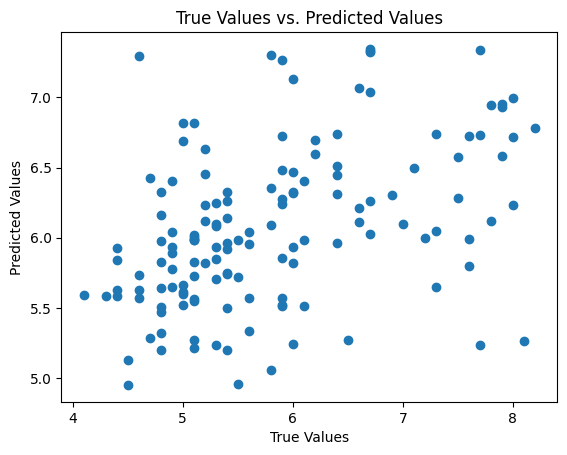

In [98]:
plt.scatter(y_test_ph, y_test_pred_ph)

# 添加标签和标题
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# 显示图表
plt.show()

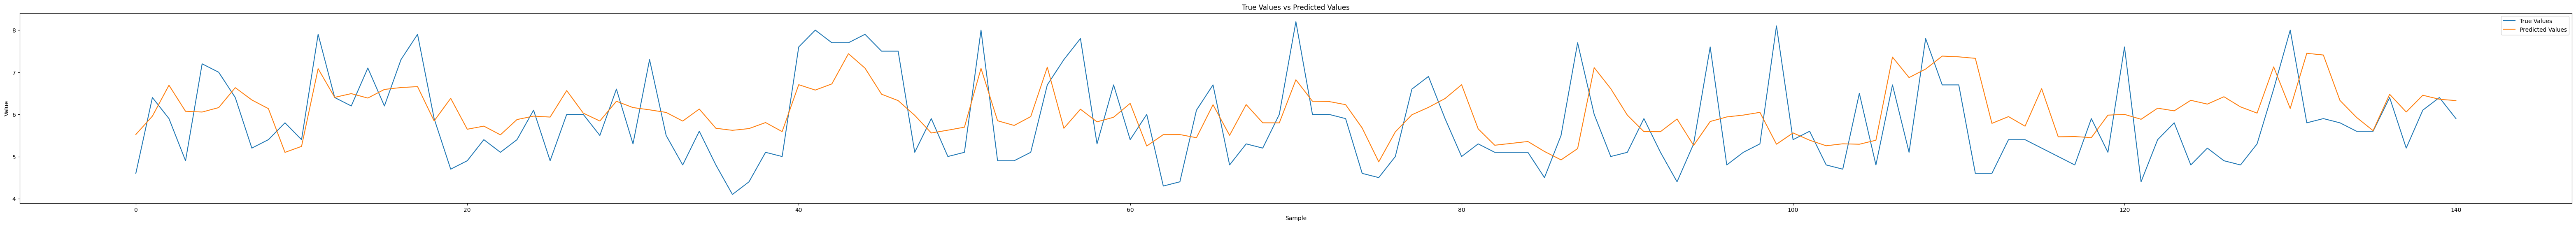

In [100]:
# 创建折线图
plt.figure(figsize=(80,6))
plt.plot(y_test_ph, label='True Values')
plt.plot(predictions_test, label='Predicted Values')

# 图表标题和标签
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [102]:
data_test["pred_ph"] = predictions_test
data_test

,X,Y,PLCUR,POCUR,ASP,CUR,DEM,DL,DZ,NDVI,PRE,SLOPE,TMP,TPI101,TPI11,TPI201,TPI5,TWI5,pH1,pred_ph
0,426049.8178,3099540.645,1.400550,-1.399254,344.876587,2.799805,965.099976,7.0,6.0,192.0,826.833313,10.848595,150.166672,-10.788635,-0.050964,-14.137451,0.003113,6.225521,4.6,5.523319
1,424922.4587,3096533.090,-2.522954,2.676753,57.264351,-5.199707,891.400024,3.0,6.0,235.0,819.833313,14.017262,156.250000,-15.232605,-0.209045,-23.497498,-0.012268,4.602912,6.4,5.958755
2,423145.3092,3096493.346,0.000000,0.399902,180.000000,-0.399902,873.500000,7.0,8.0,112.0,819.750000,0.572799,156.833328,-4.596802,-0.081848,-17.307007,-0.002747,9.242903,5.9,6.691986
3,423304.5794,3095087.012,0.184639,-0.215508,152.648422,0.400147,870.700012,22.0,6.0,226.0,816.833313,4.666484,157.916672,-6.337097,-0.049133,-11.128784,-0.005737,6.696948,4.9,6.073241
4,423555.5811,3093706.700,-1.187759,2.011948,353.073212,-3.199707,917.400024,3.0,6.0,114.0,817.583313,15.081197,156.416672,3.633057,0.076660,2.630066,0.007507,6.218498,7.2,6.055684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,434616.5076,3100324.330,-1.354114,2.646374,326.673462,-4.000488,773.599976,3.0,6.0,2030.0,824.583313,23.597338,159.250000,-39.609741,-0.291870,-77.841370,0.053040,4.136921,6.4,6.476655
137,426889.0177,3098275.379,0.799805,4.000000,0.320005,-3.200195,874.799988,3.0,6.0,149.0,821.916687,24.108879,154.666672,-22.616943,1.327576,-35.558960,0.065063,3.828163,5.2,6.056705
138,432009.5872,3100927.318,-0.254982,2.544823,82.875969,-2.799805,766.500000,7.0,2.0,323.0,825.583313,6.895482,160.583328,-23.674255,-1.779907,-34.757874,-0.122742,6.911145,6.1,6.454350
139,432016.4527,3100923.954,-0.448806,-0.048903,31.760740,-0.399902,766.299988,7.0,2.0,323.0,825.583313,3.533275,160.583328,-24.014465,-1.837830,-34.691894,-0.141541,9.521799,6.4,6.359252


In [103]:
data_test.to_csv("result.csv")

In [101]:
predictor.evaluate(test_data, silent=True)

{'root_mean_squared_error': -0.6887529235699065,
 'mean_squared_error': -0.4743805897260934,
 'mean_absolute_error': -0.5487655654974511,
 'r2': 0.4913782814846933,
 'pearsonr': 0.707991273697003,
 'median_absolute_error': -0.46156389236450224}

In [210]:

def calculate_modified_r2(y_true, y_pred):
    diff = np.abs(y_true - y_pred)/y_true
    modified_diff = np.where(diff <= 0.16, 0, np.abs(y_true - y_pred))
    modified_ssr = np.sum(modified_diff**2)
    
    mean = np.mean(y_true)
    total_diff = np.sum((y_true - mean)**2)
    
    r2 = 1 - (modified_ssr / total_diff)
    return r2

print(calculate_modified_r2(test_data[label], y_test_pred))

0.609439123514638


In [211]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-0.740984,-0.715480,0.004364,0.001683,0.278744,0.004364,0.001683,0.278744,1,True,4
1,CatBoost,-0.742429,-0.719959,0.007320,0.003921,0.853909,0.007320,0.003921,0.853909,1,True,6
2,XGBoost,-0.744168,-0.721155,0.008503,0.002826,0.369916,0.008503,0.002826,0.369916,1,True,9
3,WeightedEnsemble_L2,-0.745580,-0.704676,0.157524,0.105308,6.668760,0.002670,0.000307,0.142850,2,True,12
4,ExtraTreesMSE,-0.746194,-0.715443,0.111731,0.077044,0.453620,0.111731,0.077044,0.453620,1,True,7
5,LightGBMXT,-0.751865,-0.729285,0.009533,0.002803,2.066669,0.009533,0.002803,2.066669,1,True,3
6,RandomForestMSE,-0.752279,-0.726674,0.142602,0.078026,1.356102,0.142602,0.078026,1.356102,1,True,5
7,LightGBMLarge,-0.754259,-0.723016,0.005863,0.001856,0.744382,0.005863,0.001856,0.744382,1,True,11
8,NeuralNetFastAI,-0.791416,-0.752817,0.031447,0.010445,2.681727,0.031447,0.010445,2.681727,1,True,8
9,NeuralNetTorch,-0.814286,-0.745130,0.007905,0.004695,4.672598,0.007905,0.004695,4.672598,1,True,10
